# First Dot

In [2]:
import matplotlib
# matplotlib.use("Qt5Agg")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal, stats
import mat73
import re
from neurodsp.timefrequency import compute_wavelet_transform
import os
import mne
import IPython
import seaborn as sns
import scipy
import joblib
import pickle

import statsmodels
from statsmodels import stats
from statsmodels.stats import multitest

# Import required code for visualizing example models
from fooof import FOOOF
from fooof.sim.gen import gen_power_spectrum
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectra
from fooof.plts.annotate import plot_annotated_model
from neurodsp.utils import create_times
from neurodsp.plts.time_series import plot_time_series
from neurodsp.spectral import compute_spectrum, rotate_powerlaw
from neurodsp.plts.spectral import plot_power_spectra

## import custom functions
import sys
sys.path.append('/home/brooke/pacman/preprocessing/scripts')
import preproc_functions
import average_tfr_functions



In [3]:
# folders
raw_dir = '/home/brooke/pacman/raw_data'
preproc_dir = '/home/brooke/pacman/preprocessing'
tfr_dir = '/home/brooke/knight_server/remote/bstavel/pacman/preprocessing'

# subjects
sub_list = ['BJH021', 'BJH025', 'BJH016', 'SLCH002', 'BJH026', 'BJH027', 'BJH029', 'BJH039', 'BJH041', 'LL10', 'LL12', 'LL13', 'LL14', 'LL17', 'LL19']

# conditions
conditions = ['TrialType <= 16', 'TrialType > 16']

## Hippocampus

In [4]:
all_subs_average_hcs = calculate_first_dot_average(sub_list, conditions, 'hc')
all_subs_average_hc_conflict = all_subs_average_hcs[0]
all_subs_average_hc_noconflict = all_subs_average_hcs[1]


Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH021/ieeg/first_dot/hc-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH025/ieeg/first_dot/hc-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025']
currently used subs: ['BJH021', 'BJH025']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/SLCH002/ieeg/first_dot/hc-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025', 'SLCH002']
currently used subs: ['BJH021', 'BJH025', 'SLCH002']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH027/ieeg/first_dot/hc-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025', 'SLCH002', 'BJH027']
Readin

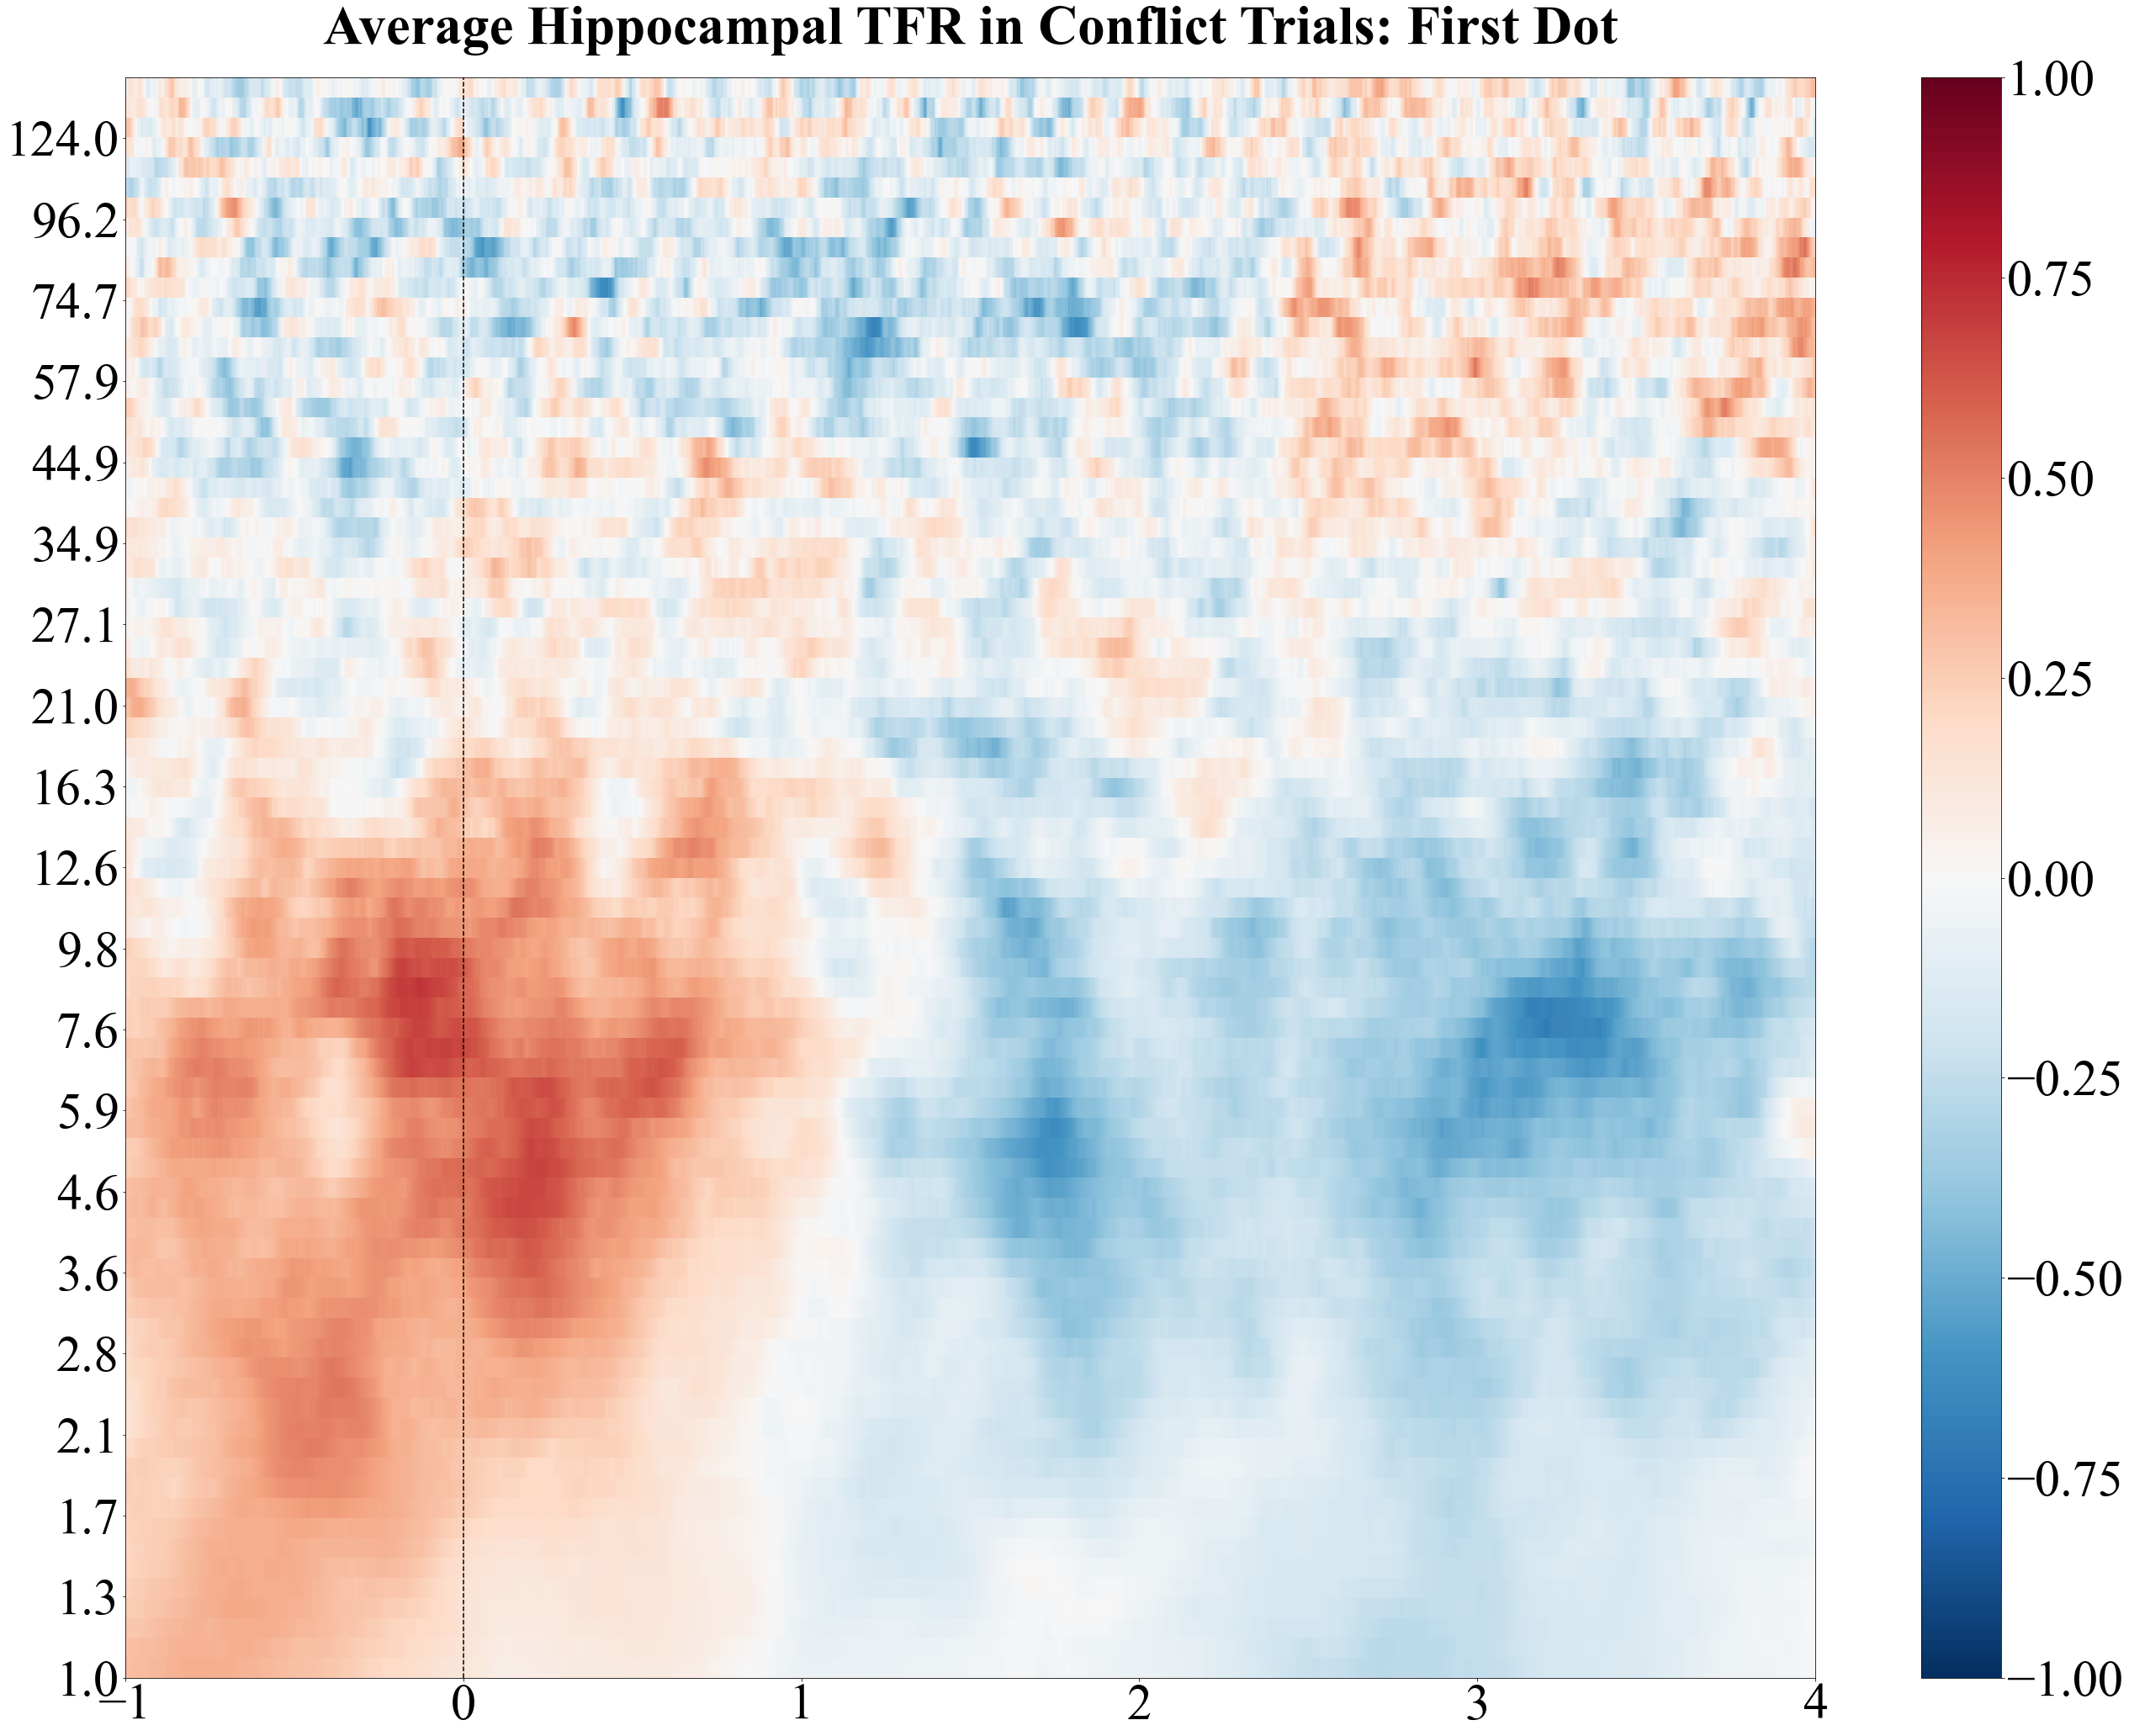

In [12]:
plot_allsub_averages(all_subs_average_hc_conflict, "Average Hippocampal TFR in Conflict Trials: First Dot", 'average_hc_first_dot_all_subs.png', -1, 4)

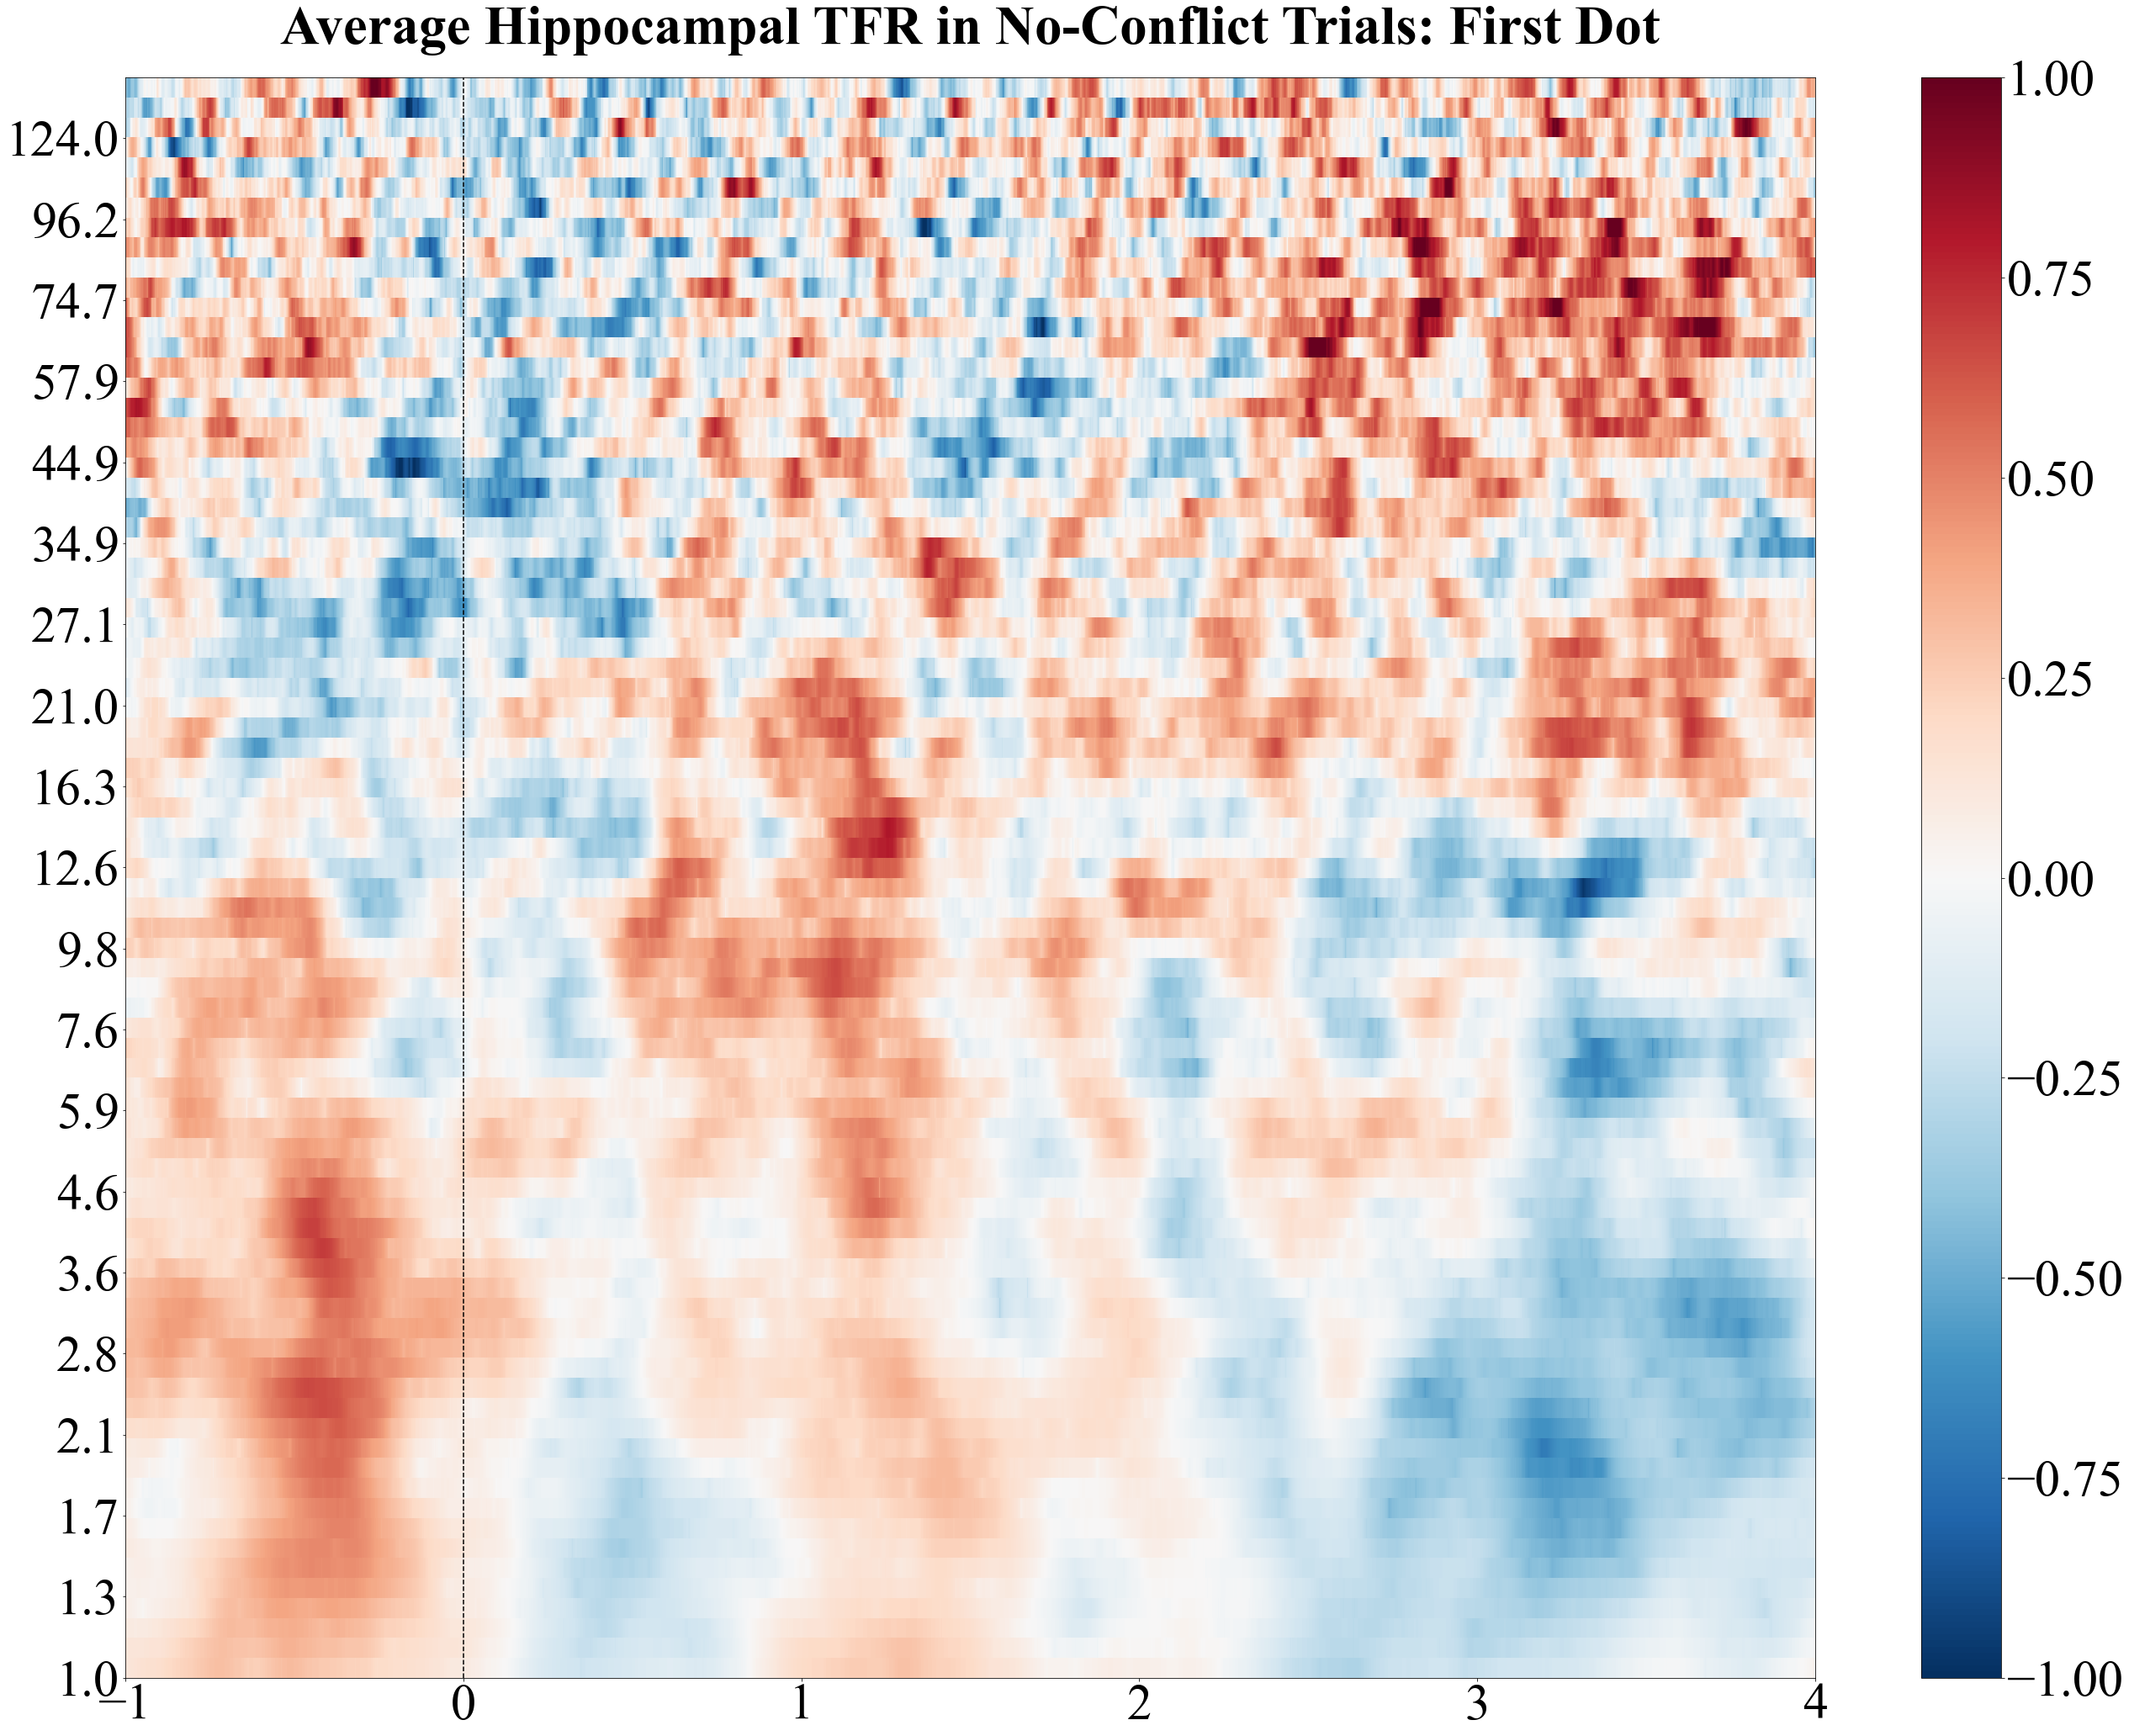

In [6]:
plot_allsub_averages(all_subs_average_hc_noconflict, "Average Hippocampal TFR in No-Conflict Trials: First Dot", 'average_hc_first_dot_noconflict_all_subs.png', -1, 4)

## OFC

In [7]:
all_subs_average_ofcs = calculate_first_dot_average(sub_list, conditions, 'ofc')
all_subs_average_ofc_conflict = all_subs_average_ofcs[0]
all_subs_average_ofc_noconflict = all_subs_average_ofcs[1]


Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH021/ieeg/first_dot/ofc-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH025/ieeg/first_dot/ofc-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025']
currently used subs: ['BJH021', 'BJH025']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/SLCH002/ieeg/first_dot/ofc-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025', 'SLCH002']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH026/ieeg/first_dot/ofc-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025', 'SLCH002', 'BJH026']
Reading /home/brooke/knight_server/remote/bstavel/pacma

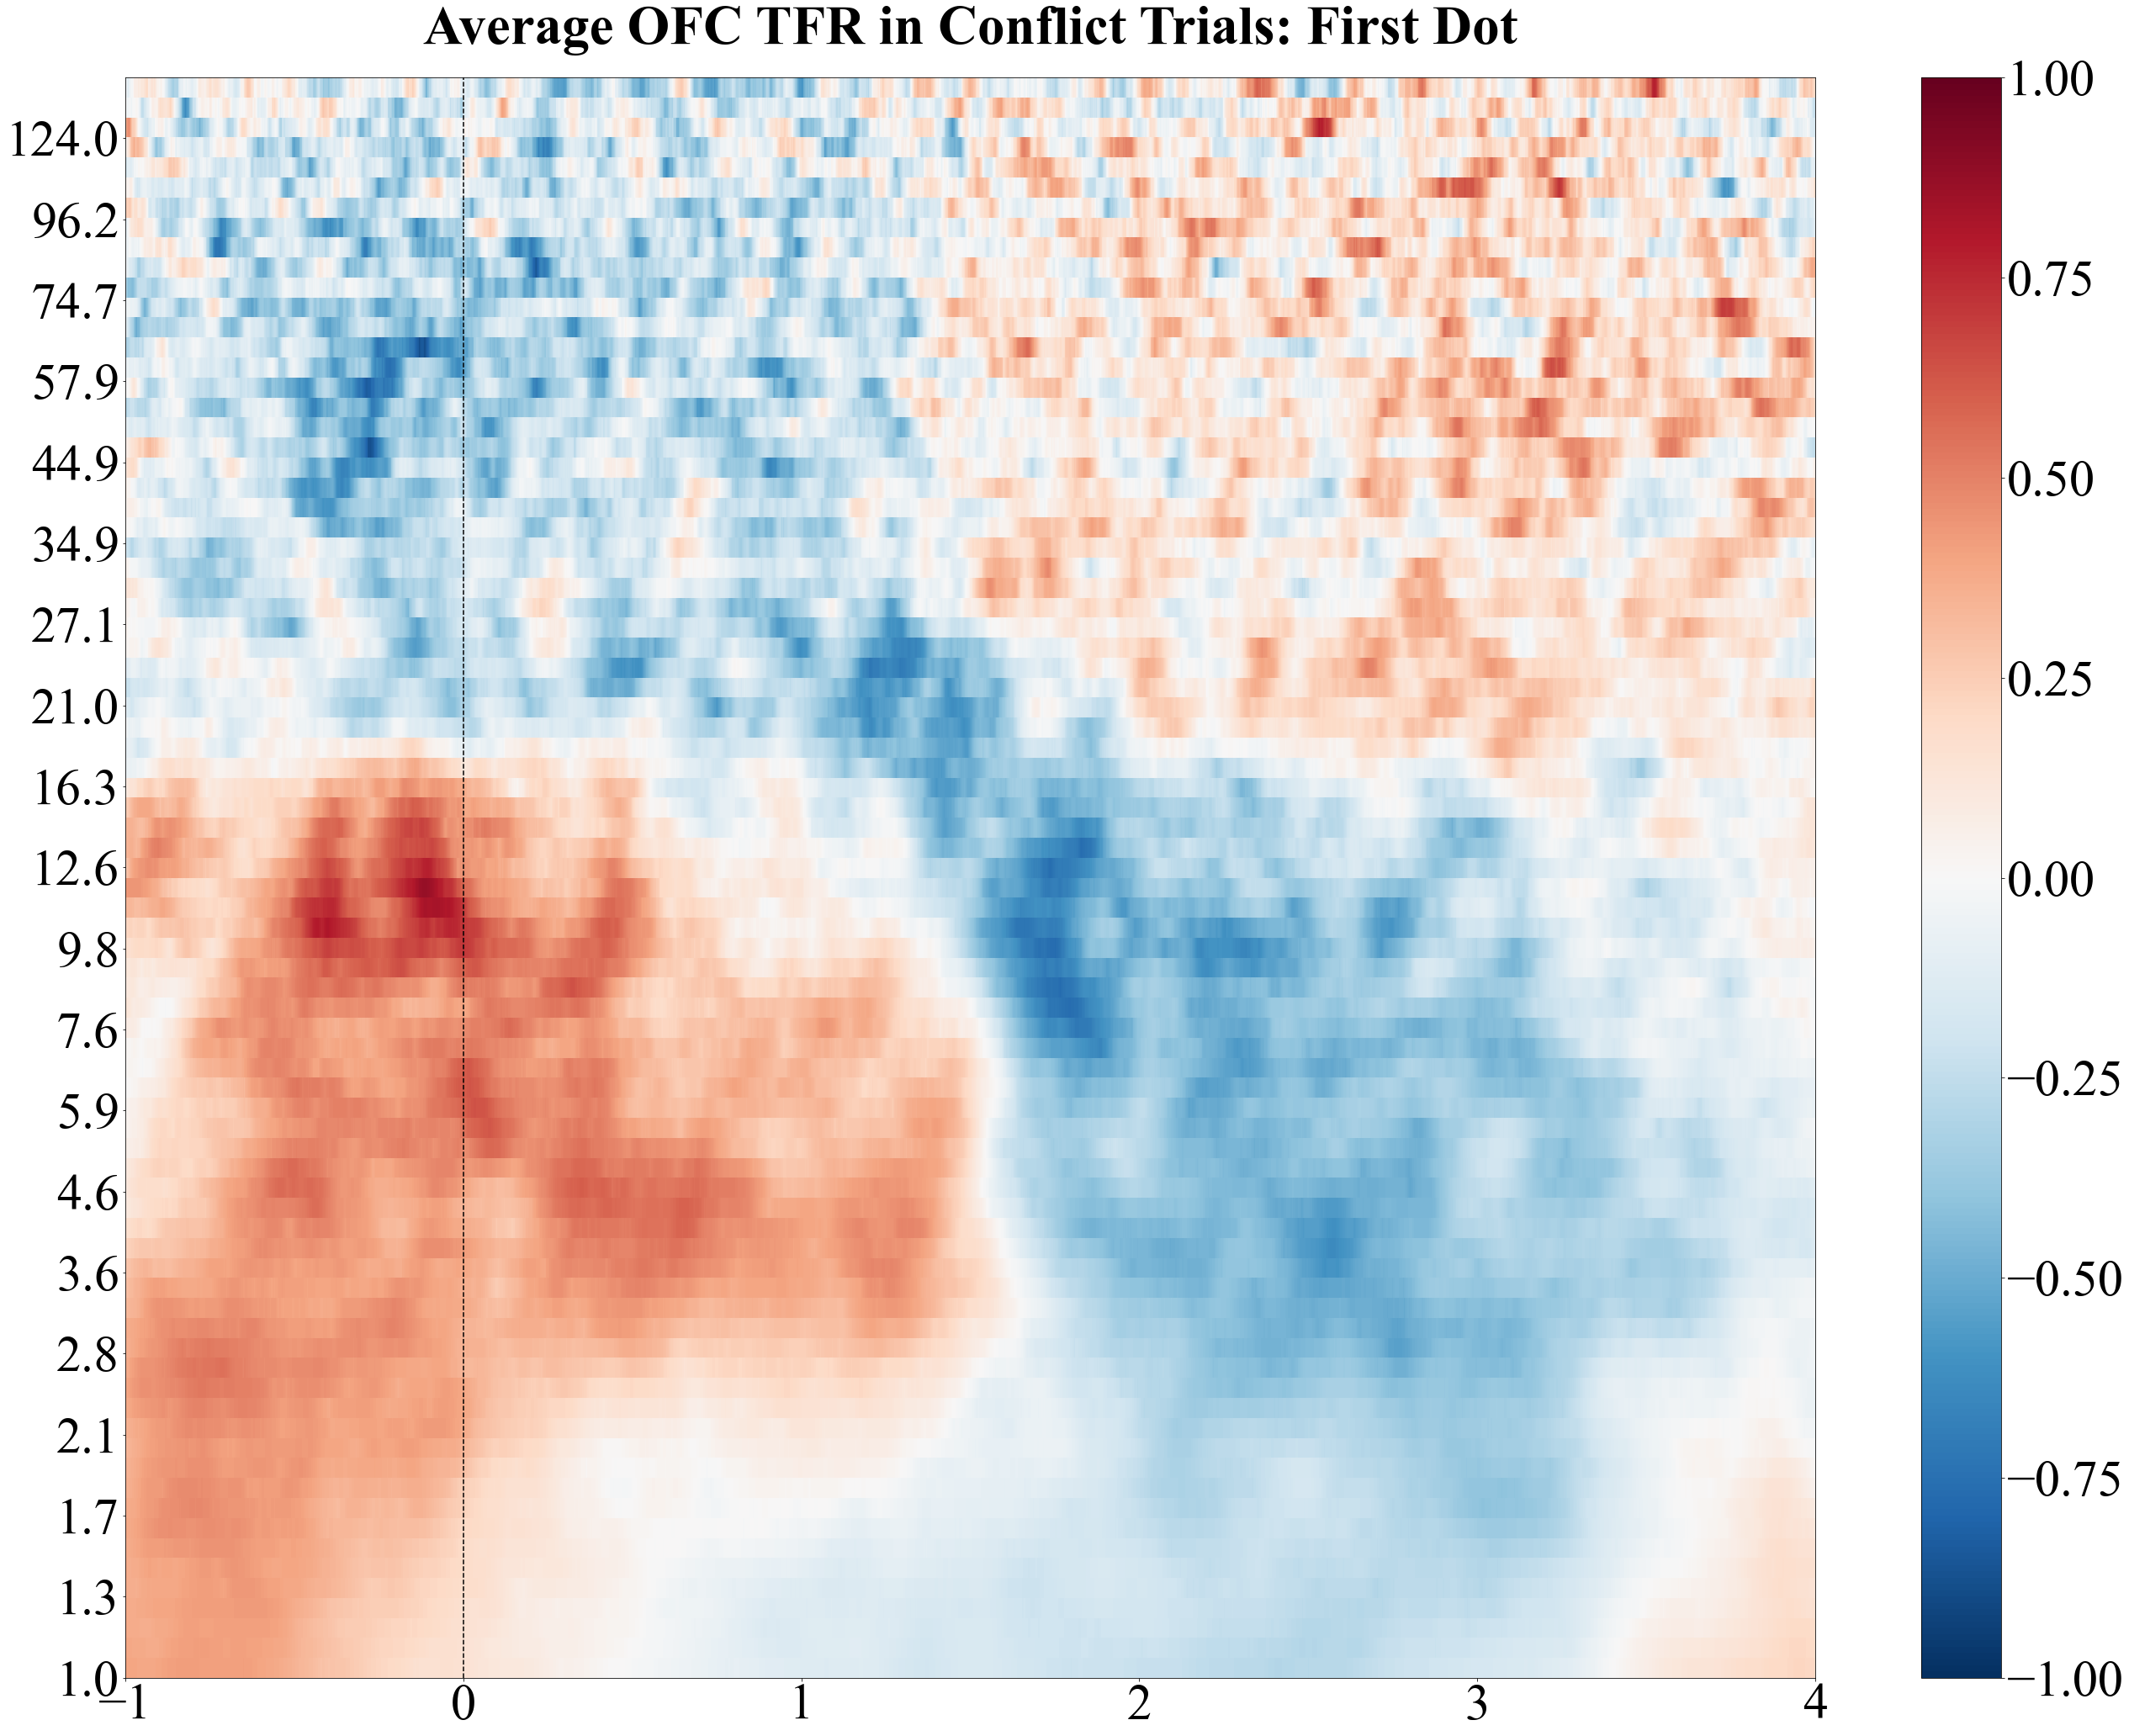

In [8]:
plot_allsub_averages(all_subs_average_ofc_conflict, "Average OFC TFR in Conflict Trials: First Dot", 'average_ofc_first_dot_all_subs.png', -1, 4)

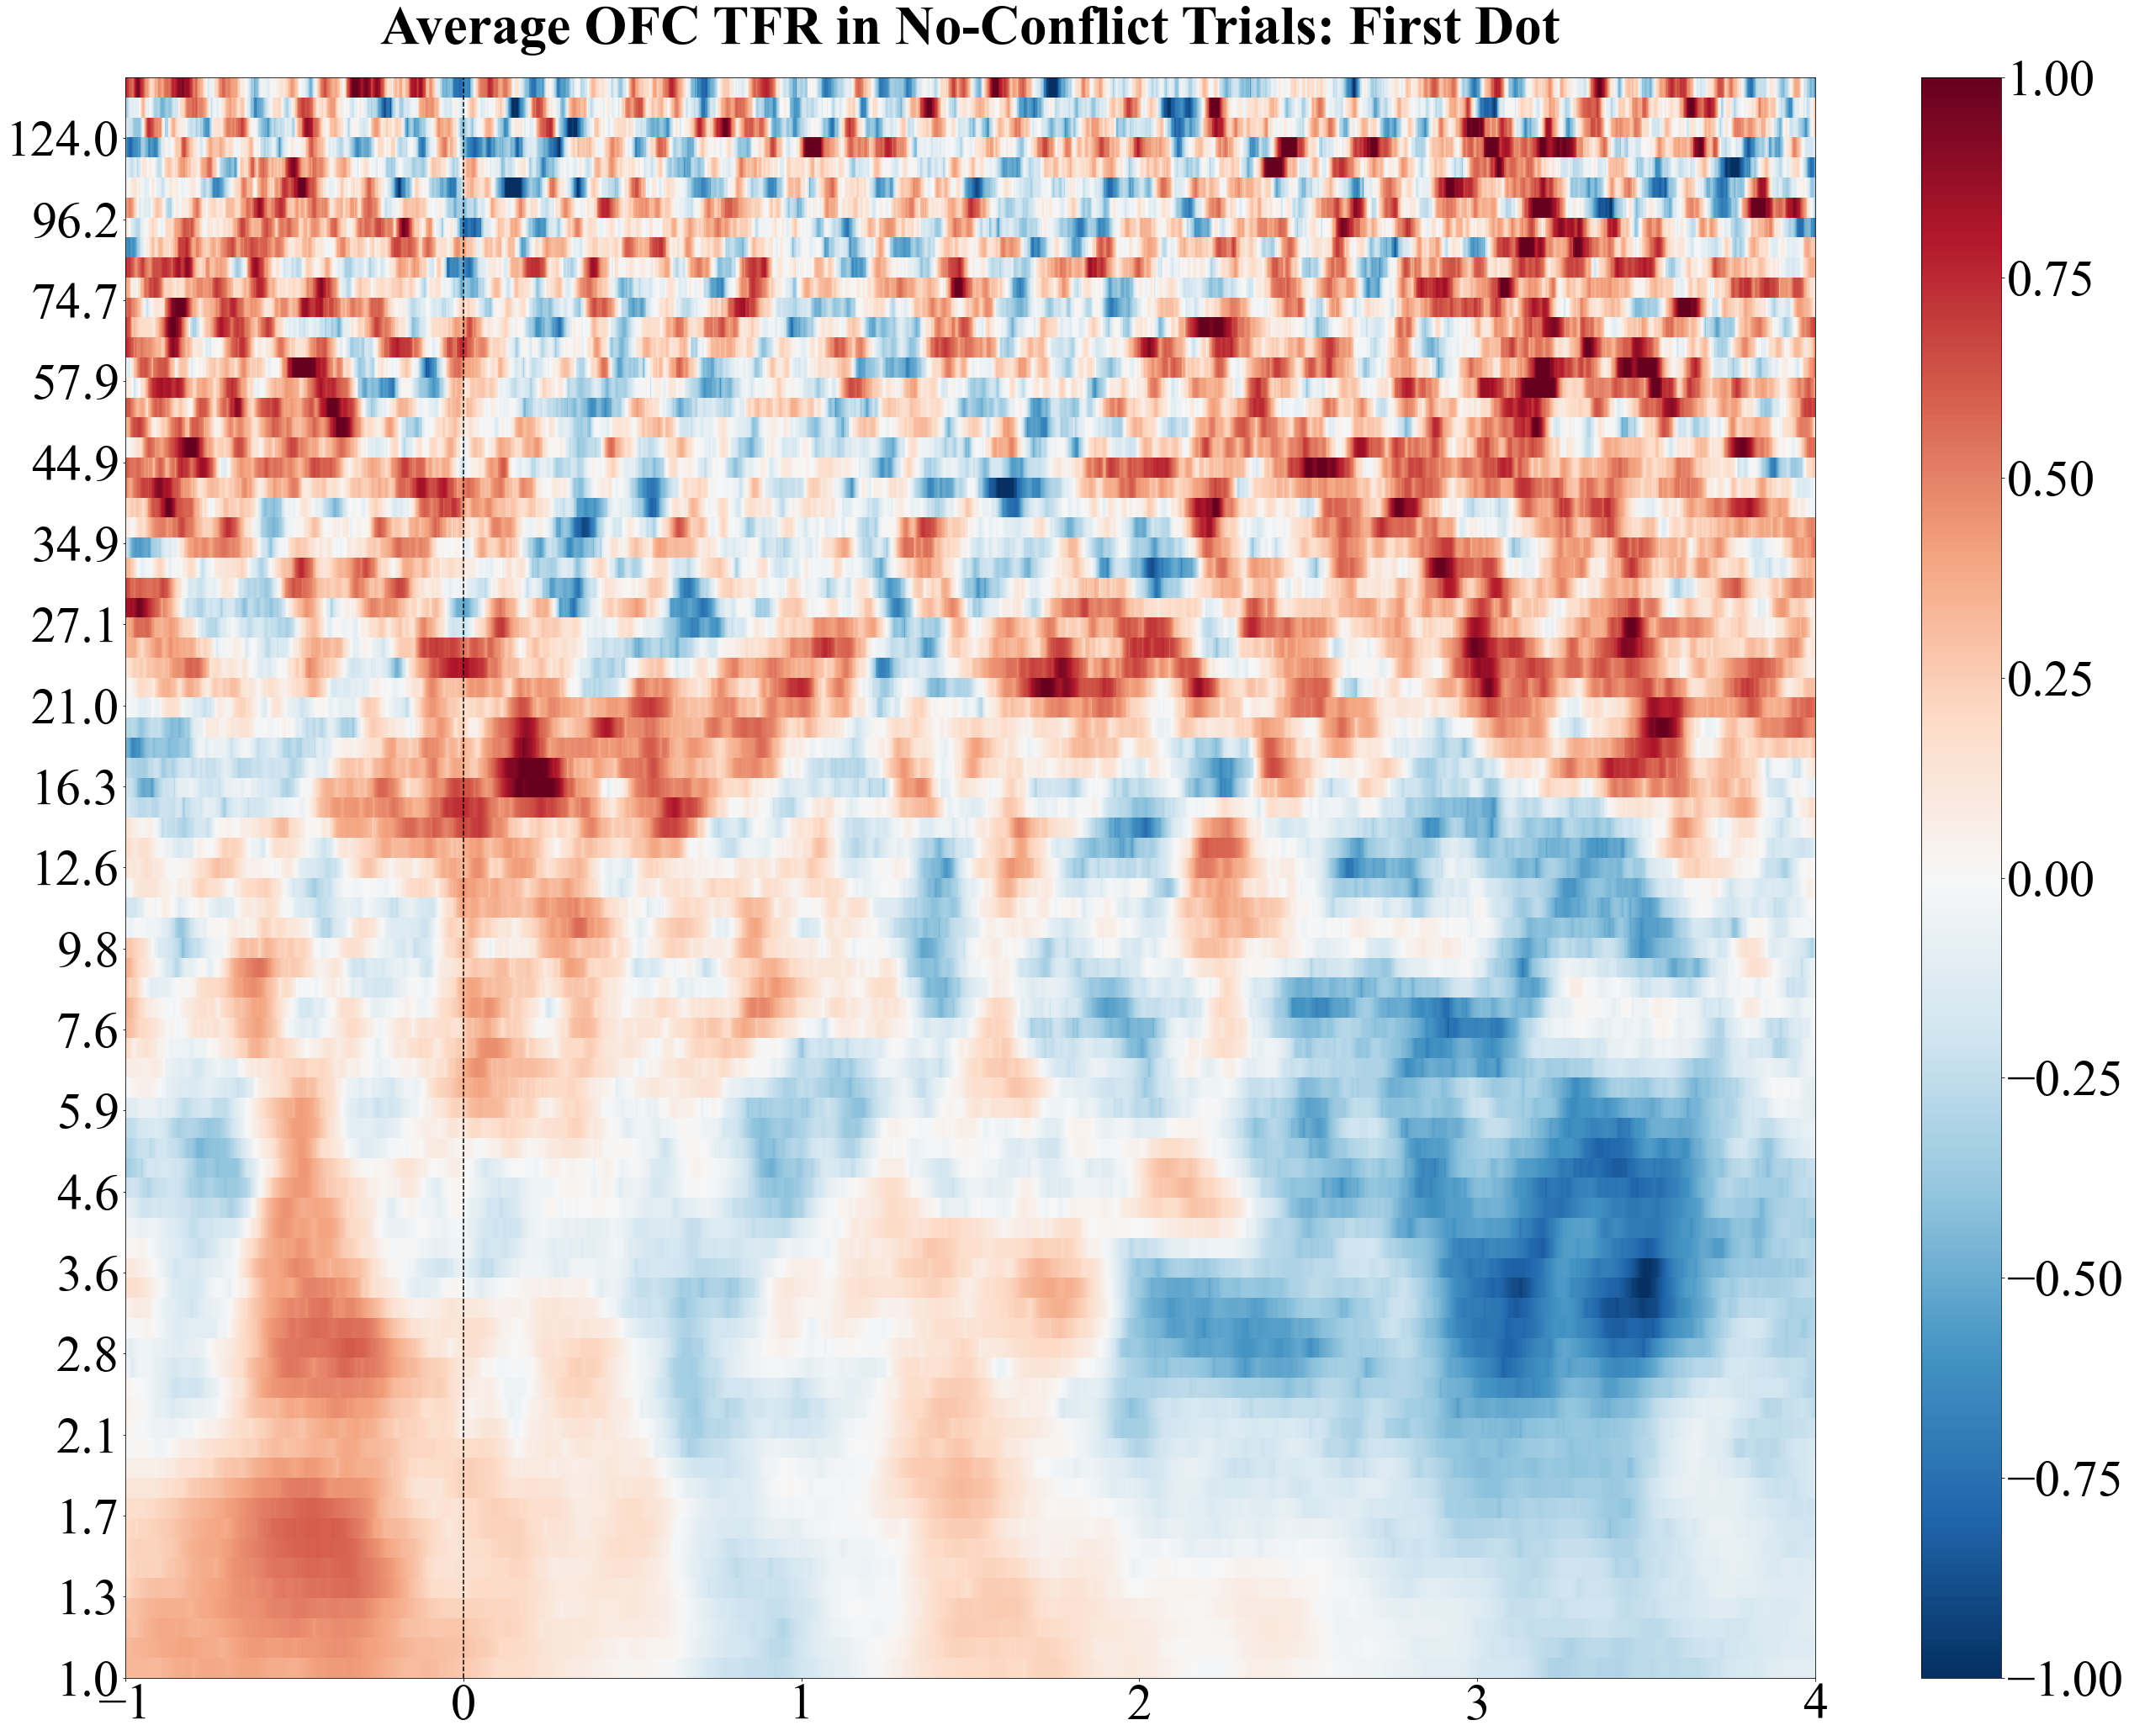

In [9]:
plot_allsub_averages(all_subs_average_ofc_noconflict, "Average OFC TFR in No-Conflict Trials: First Dot", 'average_ofc_first_dot_noconflict_all_subs.png', -1, 4)

## Anterior Cingulate

In [10]:
all_subs_average_cings = calculate_first_dot_average(sub_list, conditions, 'cing')
all_subs_average_cing_conflict = all_subs_average_cings[0]
all_subs_average_cing_noconflict = all_subs_average_cings[1]


Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH021/ieeg/first_dot/cing-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH025/ieeg/first_dot/cing-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025']
currently used subs: ['BJH021', 'BJH025']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/SLCH002/ieeg/first_dot/cing-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025', 'SLCH002']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH026/ieeg/first_dot/cing-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025', 'SLCH002', 'BJH026']
currently used subs: ['BJH021', 'BJH025', 'SLCH002'

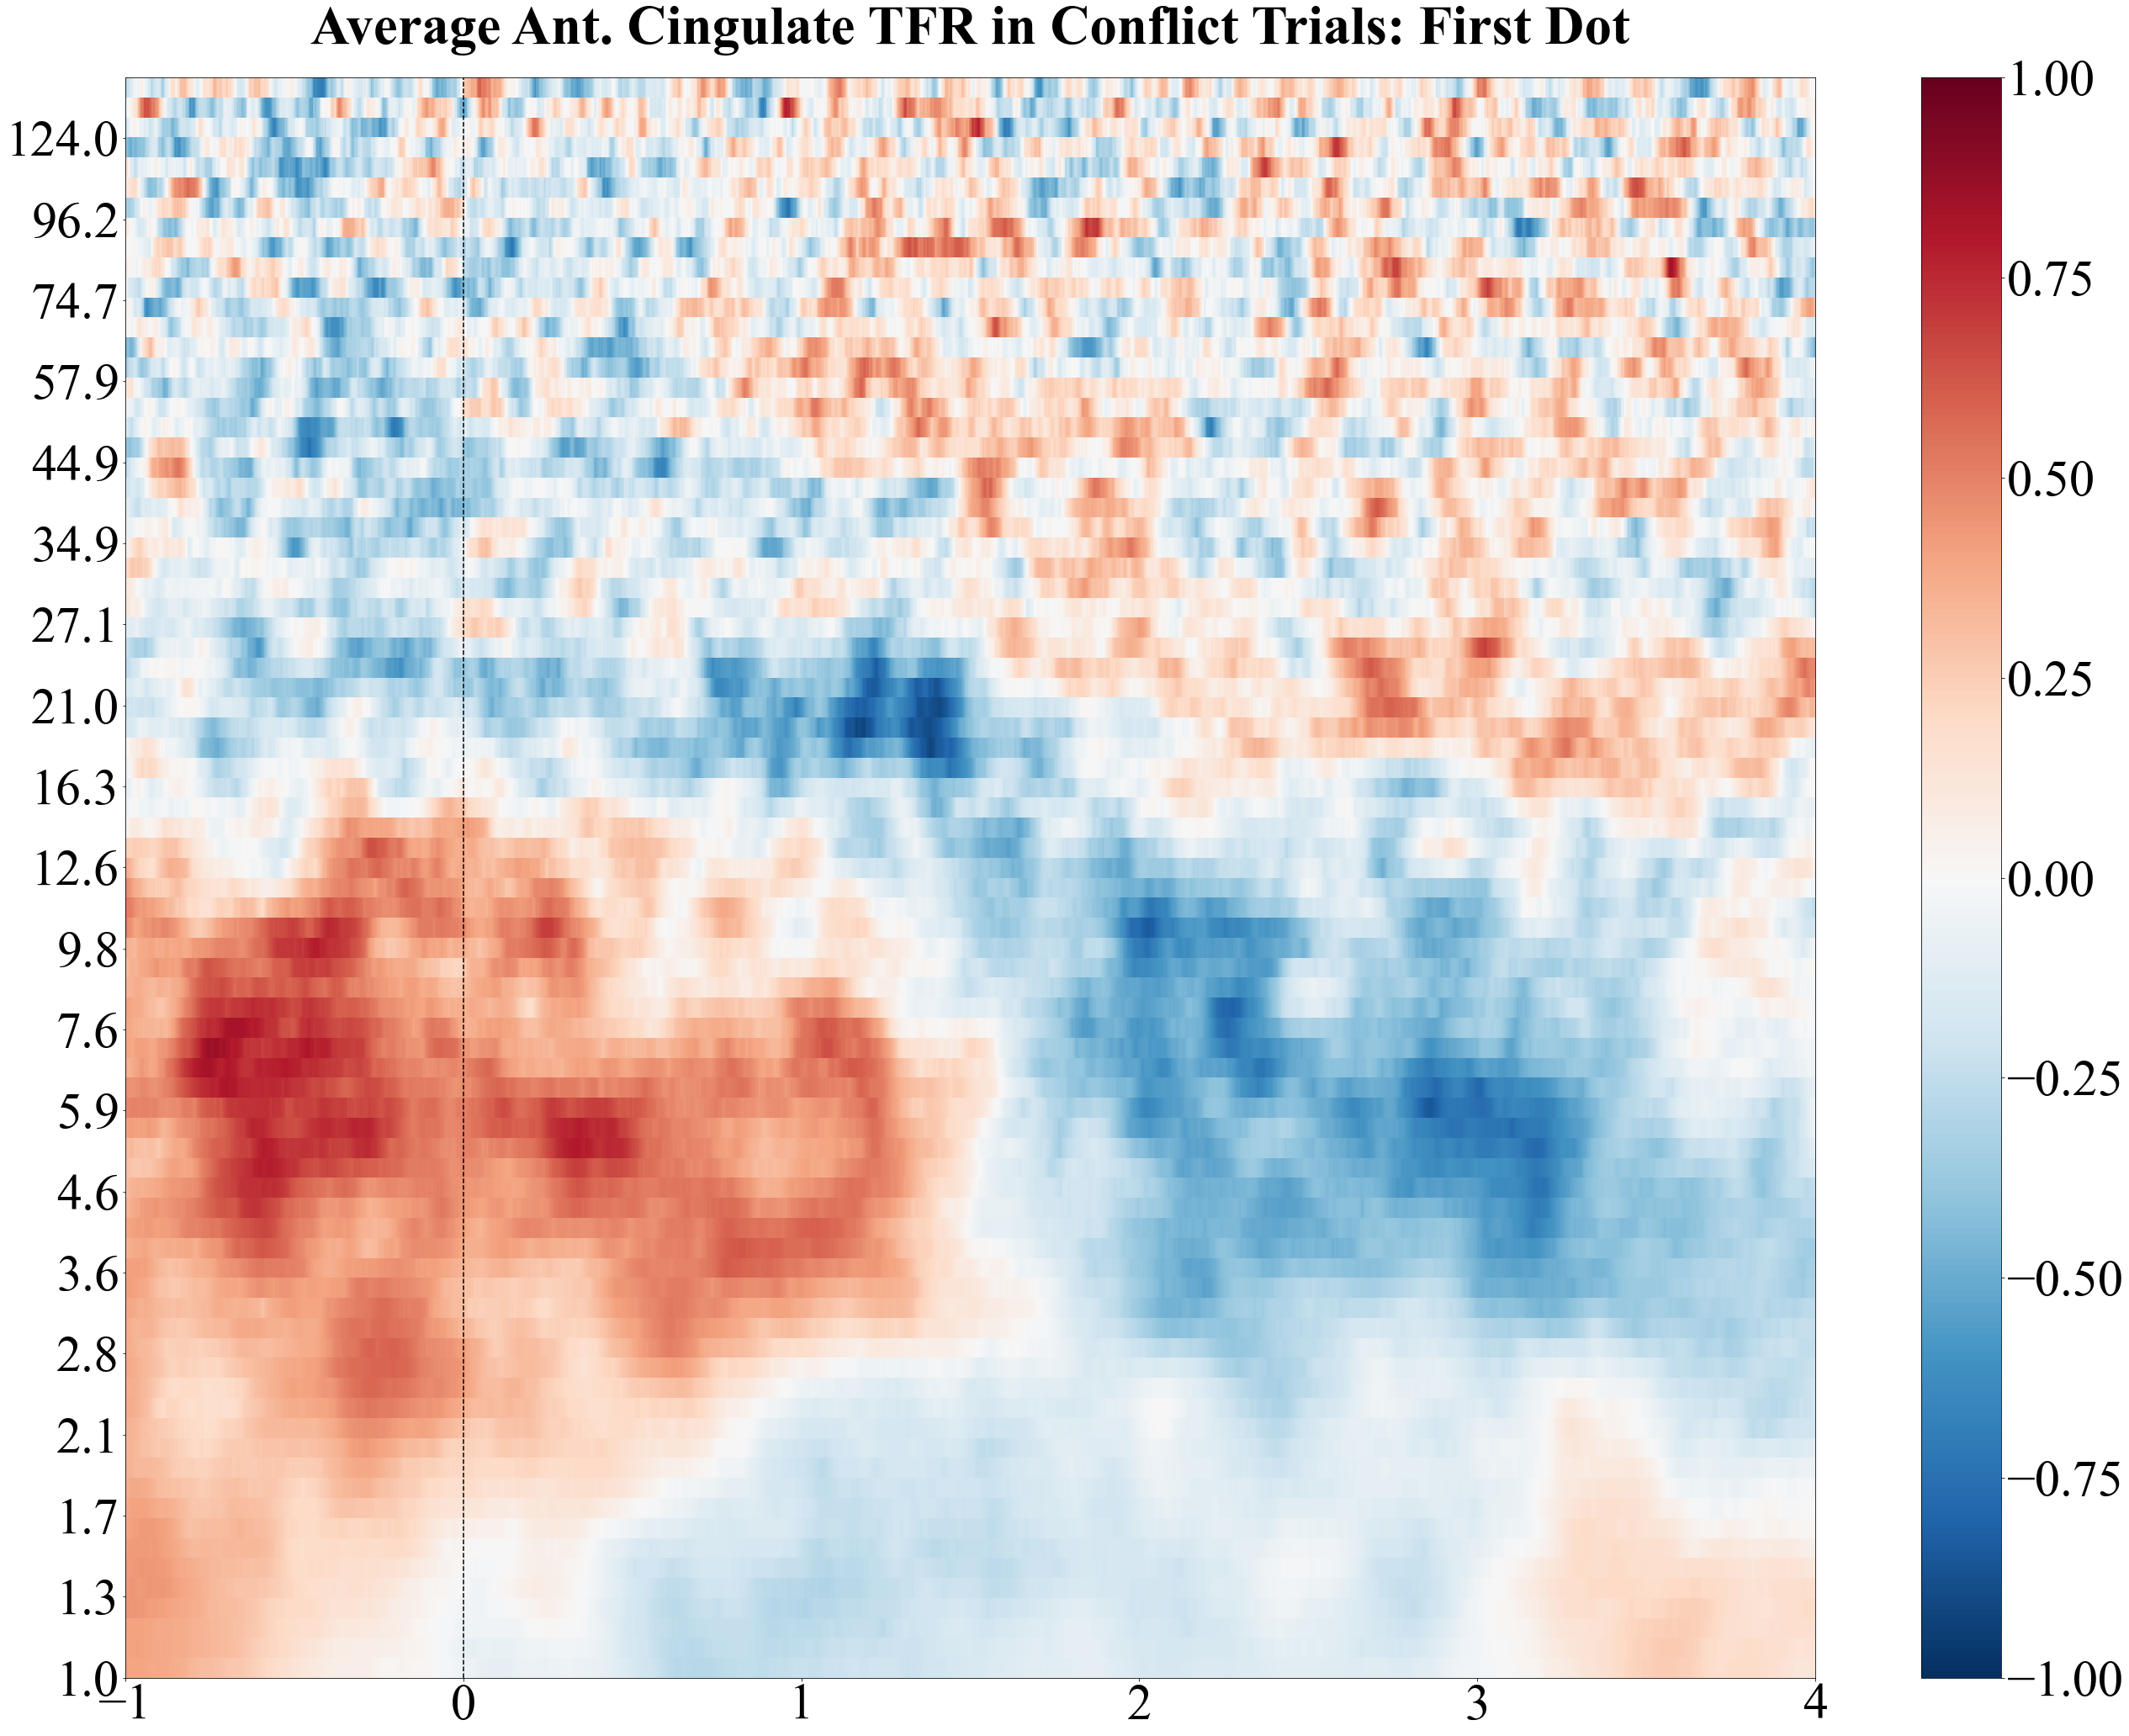

In [11]:
plot_allsub_averages(all_subs_average_cing_conflict, "Average Ant. Cingulate TFR in Conflict Trials: First Dot", 'average_cing_first_dot_all_subs.png', -1, 4)

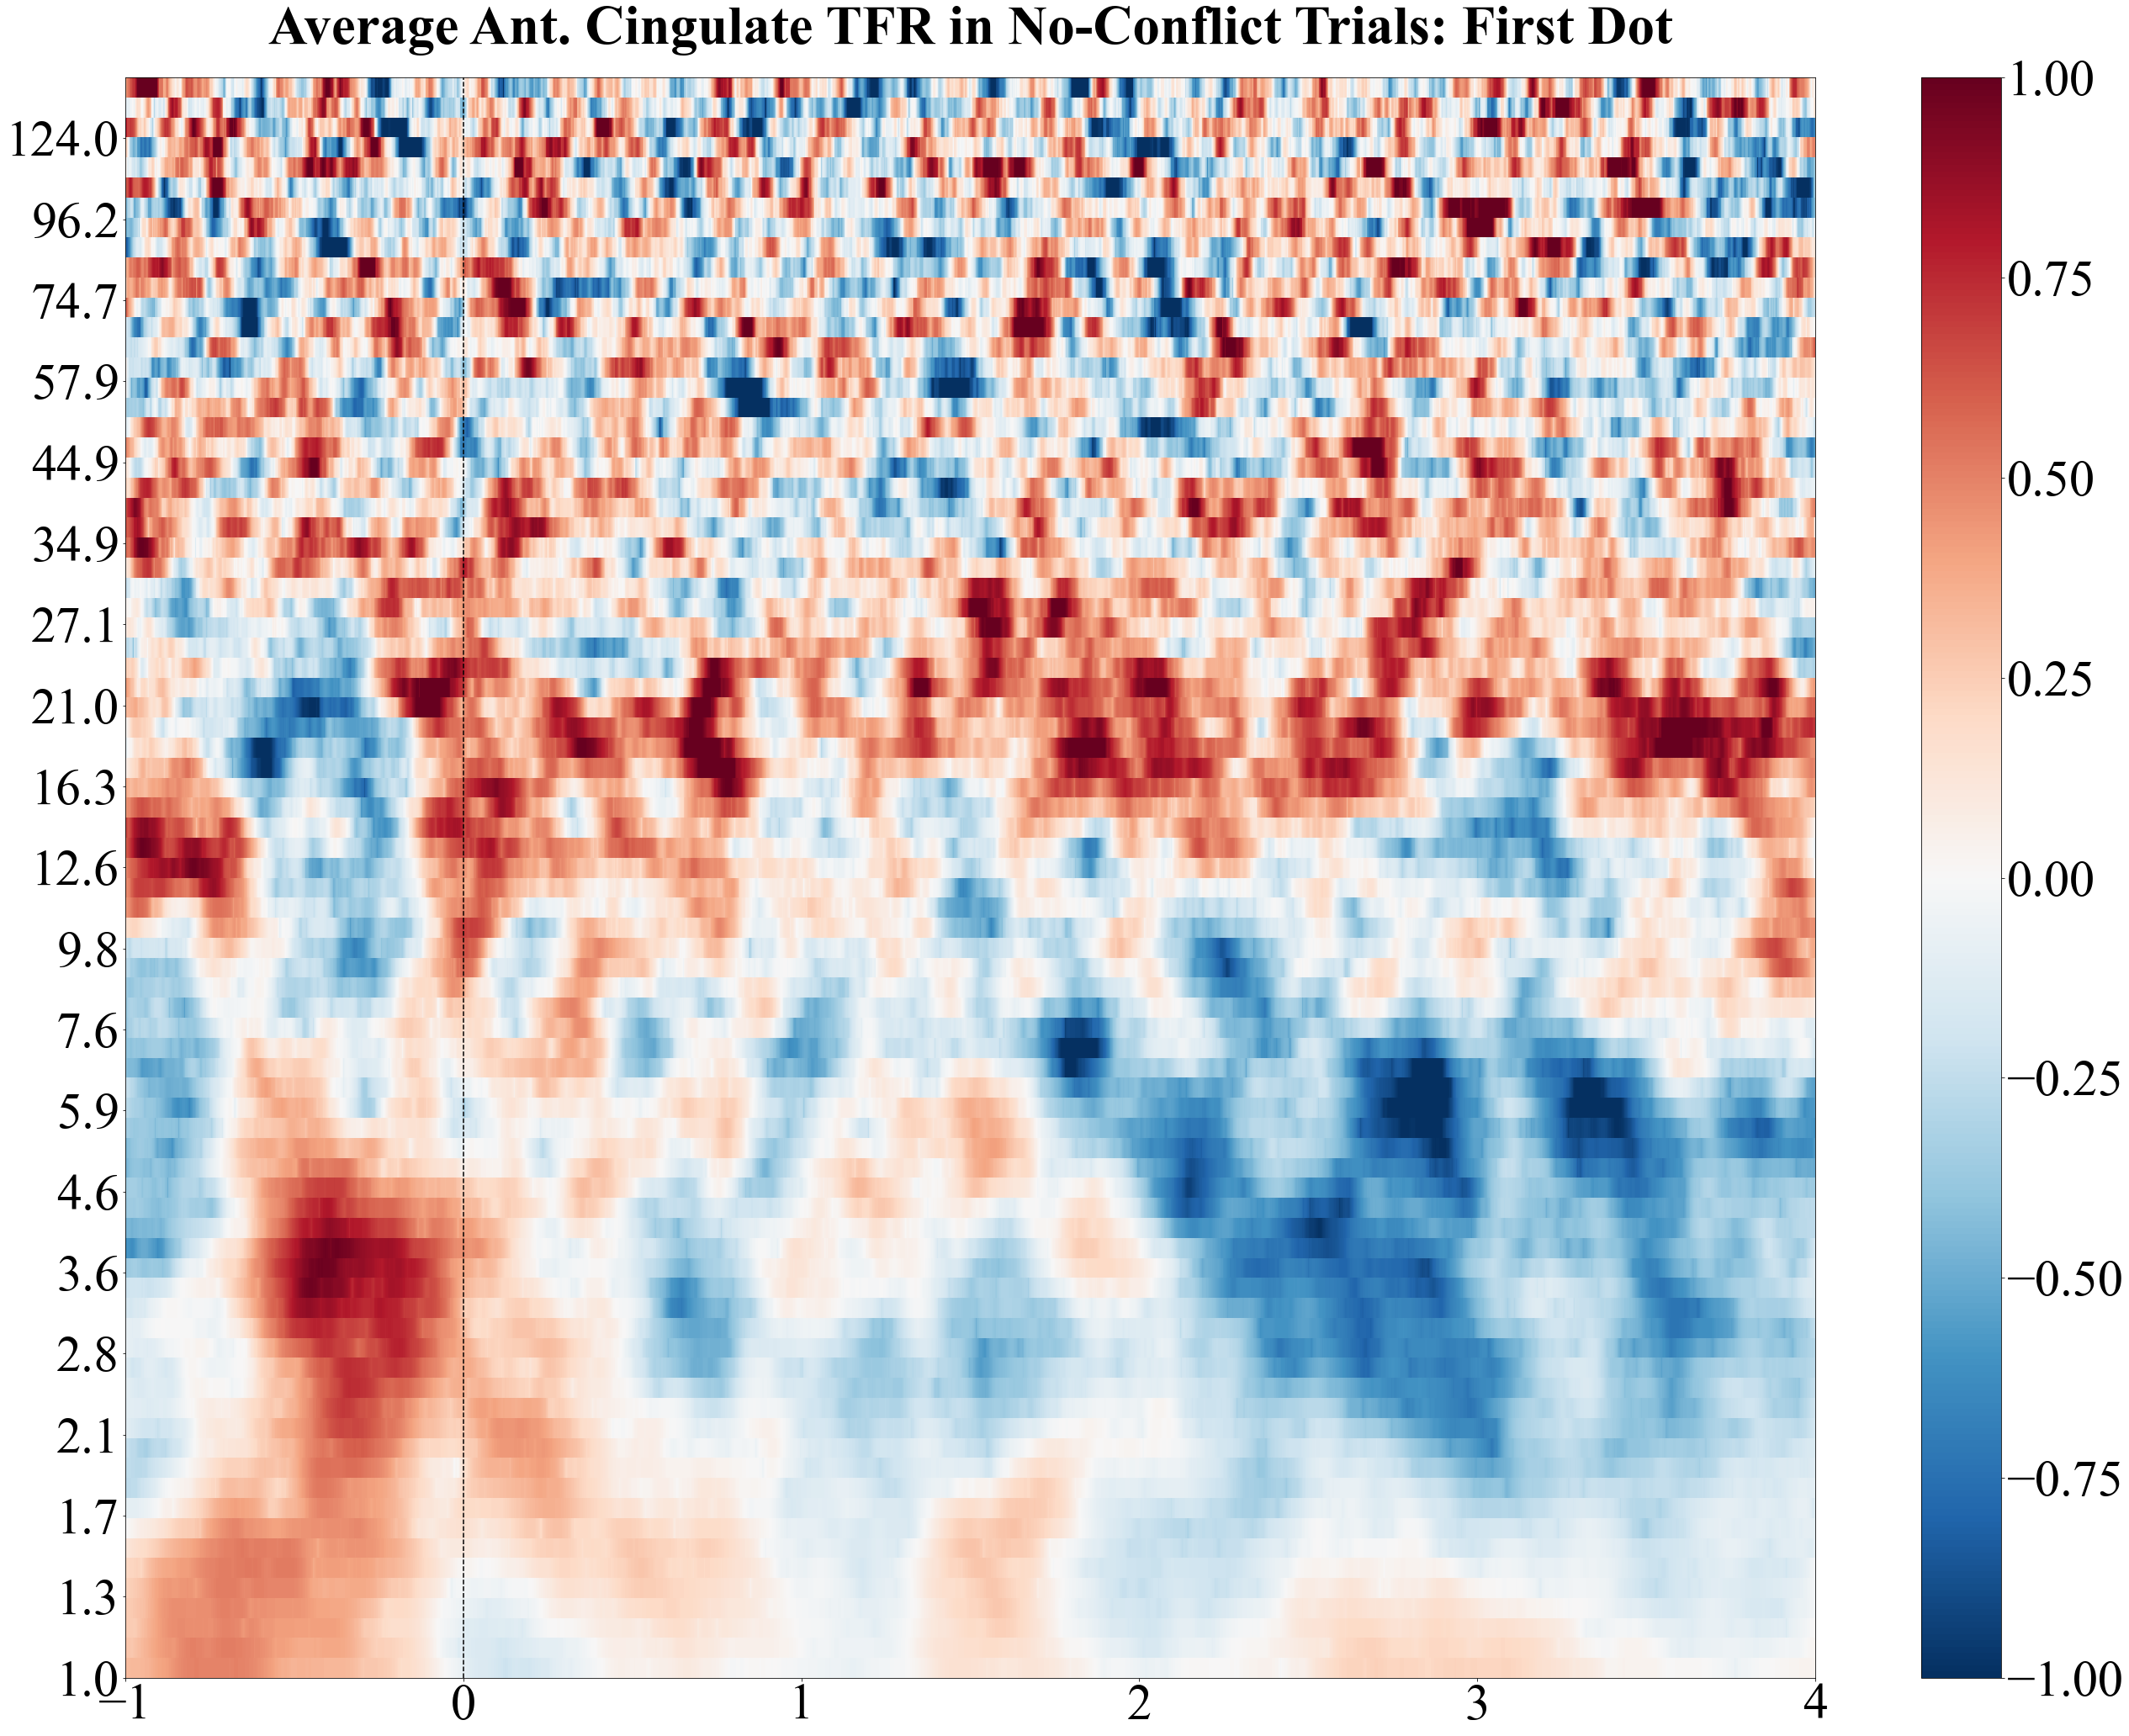

In [12]:
plot_allsub_averages(all_subs_average_cing_noconflict, "Average Ant. Cingulate TFR in No-Conflict Trials: First Dot", 'average_cing_first_dot_noconflict_all_subs.png', -1, 4)

## Amygdala

In [13]:
all_subs_average_amygs = calculate_first_dot_average(sub_list, conditions, 'amyg')
all_subs_average_amyg_conflict = all_subs_average_amygs[0]
all_subs_average_amyg_noconflict = all_subs_average_amygs[1]


Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH021/ieeg/first_dot/amyg-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH025/ieeg/first_dot/amyg-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025']
currently used subs: ['BJH021', 'BJH025']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/SLCH002/ieeg/first_dot/amyg-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025', 'SLCH002']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH026/ieeg/first_dot/amyg-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025', 'SLCH002', 'BJH026']
Reading /home/brooke/knight_server/remote/bstavel/p

In [14]:
plot_allsub_averages(all_subs_average_amyg_conflict, "Average Amygdala TFR in Conflict Trials: First Dot", 'average_amyg_first_dot_all_subs.png', -1, 4)

In [15]:
plot_allsub_averages(all_subs_average_amyg_noconflict, "Average Amygdala TFR in No-Conflict Trials: First Dot", 'average_amyg_first_dot_noconflict_all_subs.png', -1, 4)

# Other Regions

## dlPFC

In [16]:
all_subs_average_dlpfcs = calculate_first_dot_average(sub_list, conditions, 'dlpfc')
all_subs_average_dlpfc_conflict = all_subs_average_dlpfcs[0]
all_subs_average_dlpfc_noconflict = all_subs_average_dlpfcs[1]


Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH021/ieeg/first_dot/dlpfc-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH025/ieeg/first_dot/dlpfc-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025']
currently used subs: ['BJH021', 'BJH025']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/SLCH002/ieeg/first_dot/dlpfc-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025', 'SLCH002']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH026/ieeg/first_dot/dlpfc-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025', 'SLCH002', 'BJH026']
currently used subs: ['BJH021', 'BJH025', 'SLCH

In [17]:
plot_allsub_averages(all_subs_average_dlpfc_conflict, "Average dlPFC TFR in Conflict Trials: First Dot", 'average_dlpfc_first_dot_all_subs.png', -1, 4)

In [18]:
plot_allsub_averages(all_subs_average_dlpfc_noconflict, "Average dlPFC TFR in No-Conflict Trials: First Dot", 'average_dlpfc_first_dot_noconflict_all_subs.png', -1, 4)

## Insula

In [19]:
all_subs_average_insulas = calculate_first_dot_average(sub_list, conditions, 'insula')
all_subs_average_insula_conflict = all_subs_average_insulas[0]
all_subs_average_insula_noconflict = all_subs_average_insulas[1]


Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH021/ieeg/first_dot/insula-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH025/ieeg/first_dot/insula-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025']
currently used subs: ['BJH021', 'BJH025']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/SLCH002/ieeg/first_dot/insula-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025', 'SLCH002']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH026/ieeg/first_dot/insula-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH021', 'BJH025', 'SLCH002', 'BJH026']
currently used subs: ['BJH021', 'BJH025', '

In [20]:
plot_allsub_averages(all_subs_average_insula_conflict, "Average Insula TFR in Conflict Trials: First Dot", 'average_insula_first_dot_all_subs.png', -1, 4)

In [21]:
plot_allsub_averages(all_subs_average_insula_noconflict, "Average Insula TFR in No-Conflict Trials: First Dot", 'average_insula_first_dot_noconflict_all_subs.png', -1, 4)

## EC

In [22]:
all_subs_average_ecs = calculate_first_dot_average(sub_list, conditions, 'ec')
all_subs_average_ec_conflict = all_subs_average_ecs[0]
all_subs_average_ec_noconflict = all_subs_average_ecs[1]


currently used subs: []
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH025/ieeg/first_dot/ec-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH025']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH016/ieeg/first_dot/ec-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline


/home/brooke/mambaforge/envs/ieeg_analysis2/lib/python3.9/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/brooke/mambaforge/envs/ieeg_analysis2/lib/python3.9/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


currently used subs: ['BJH025', 'BJH016']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/SLCH002/ieeg/first_dot/ec-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH025', 'BJH016', 'SLCH002']
currently used subs: ['BJH025', 'BJH016', 'SLCH002']
currently used subs: ['BJH025', 'BJH016', 'SLCH002']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH029/ieeg/first_dot/ec-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH025', 'BJH016', 'SLCH002', 'BJH029']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH039/ieeg/first_dot/ec-tfr.h5 ...
Adding metadata with 5 columns
log transforming
z-scoring to baseline
currently used subs: ['BJH025', 'BJH016', 'SLCH002', 'BJH029', 'BJH039']
Reading /home/brooke/knight_server/remote/bstavel/pacman/preprocessing/BJH041/ieeg/first_dot/ec-tfr.h5 ...
Adding metadata with 5 c

In [23]:
plot_allsub_averages(all_subs_average_ec_conflict, "Average Entorhinal Cortex TFR in Conflict Trials: First Dot", 'average_ec_first_dot_all_subs.png', -1, 4)

In [24]:
plot_allsub_averages(all_subs_average_ec_noconflict, "Average Entorhinal Cortex TFR in No-Conflict Trials: First Dot", 'average_ec_first_dot_noconflict_all_subs.png', -1, 4)